In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import warnings

In [105]:
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

df = pd.read_csv("WineQT.csv")

# Preprocessing
features = df.drop(columns=['Id', 'quality'])  # Drop ID and quality for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [106]:
# PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
#pca_2d = PCA(n_components=2).fit_transform(scaled_features)
pca_3d = PCA(n_components=3).fit_transform(scaled_features)

In [107]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
pca_df['Cluster'] = clusters
df['cluster'] = clusters
scaled_features
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [108]:
# Elbow method
inertia = []
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

In [109]:
# Elbow + Silhouette
inertias, silhouettes = [], []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42).fit(scaled_features)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(scaled_features, km.labels_))

In [110]:
# Cluster Profiling
cluster_profile = df.groupby('cluster')[features.columns].mean().T
norm_profile = (cluster_profile - cluster_profile.min().min()) / (cluster_profile.max().max() - cluster_profile.min().min())

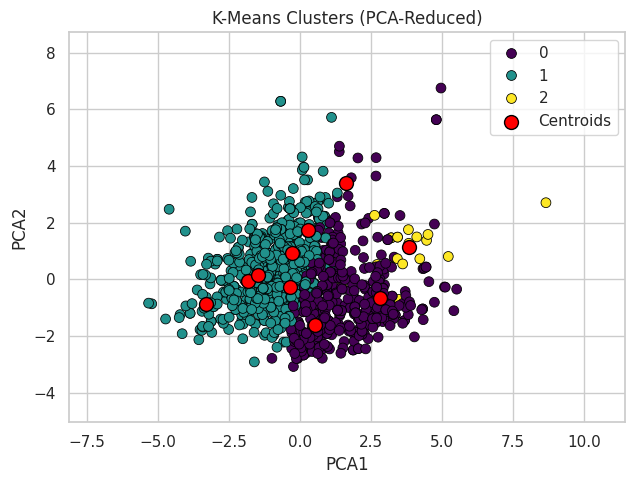

In [112]:
# K-Means Clusters in PCA Space
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=50, edgecolor='black')
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=100, label='Centroids', edgecolor='black')
x_margin = 0.2 * (pca_df['PCA1'].max() - pca_df['PCA1'].min())
y_margin = 0.2 * (pca_df['PCA2'].max() - pca_df['PCA2'].min())
plt.xlim(pca_df['PCA1'].min() - x_margin, pca_df['PCA1'].max() + x_margin)
plt.ylim(pca_df['PCA2'].min() - y_margin, pca_df['PCA2'].max() + y_margin)
plt.title('K-Means Clusters (PCA-Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.tight_layout()
plt.show()

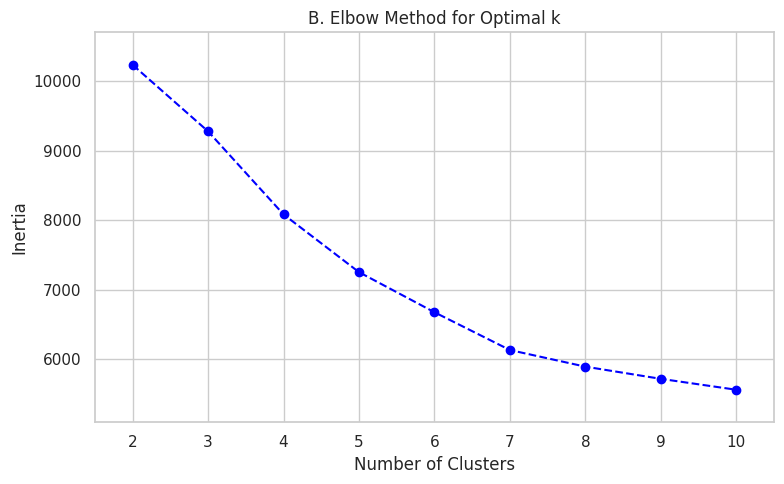

In [123]:
# Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='blue')
plt.xlim(min(k_range) - 0.5, max(k_range) + 0.5)
y_pad = 0.1 * (max(inertia) - min(inertia))
plt.ylim(min(inertia) - y_pad, max(inertia) + y_pad)
plt.xticks(k_range)
plt.title('B. Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

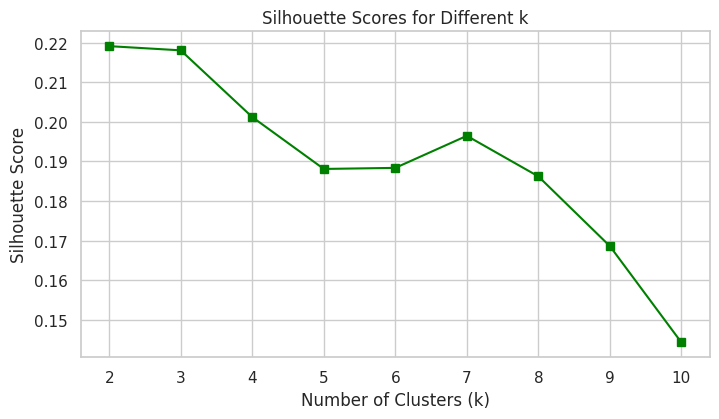

In [126]:
# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='s', linestyle='-', color='green')
plt.xticks(k_range)
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout(pad=3.0)
plt.show()

Best k: 2, Silhouette Score: 0.2191794123243473


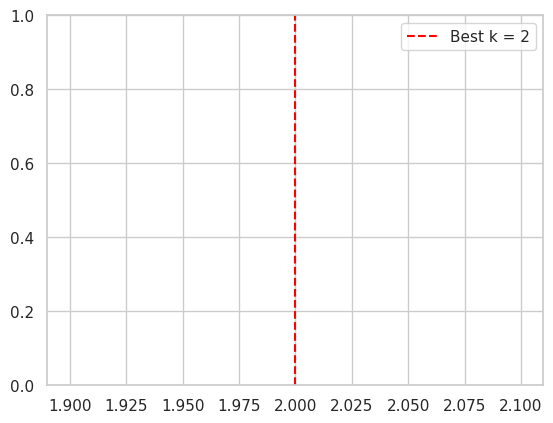

In [128]:
best_k = k_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
plt.axvline(x=best_k, linestyle='--', color='red', label=f'Best k = {best_k}')
plt.legend()
print(f"Best k: {best_k}, Silhouette Score: {best_score}")

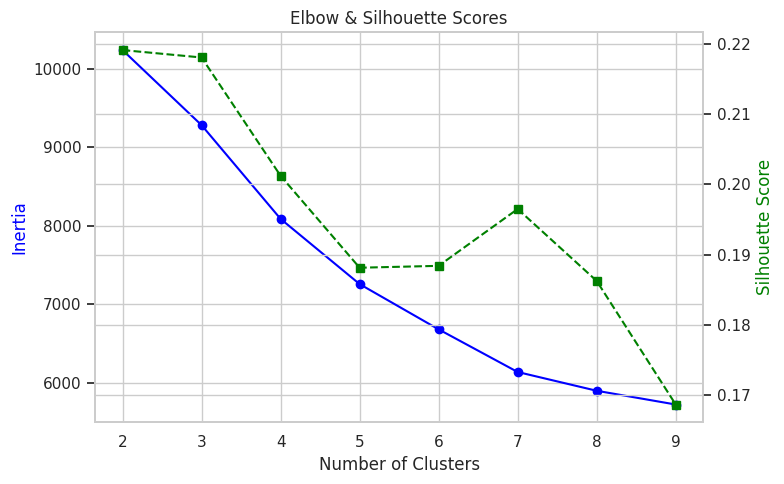

In [121]:
# Elbow + Silhouette Score Plot
fig, ax1 = plt.subplots(figsize=(8, 5))
ax2 = ax1.twinx()
ax1.plot(range(2, 10), inertias, 'o-', color='blue', label="Inertia")
ax2.plot(range(2, 10), silhouettes, 's--', color='green', label="Silhouette")
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Inertia", color='blue')
ax2.set_ylabel("Silhouette Score", color='green')
plt.title("Elbow & Silhouette Scores")
plt.grid(True)
plt.tight_layout()
plt.show()

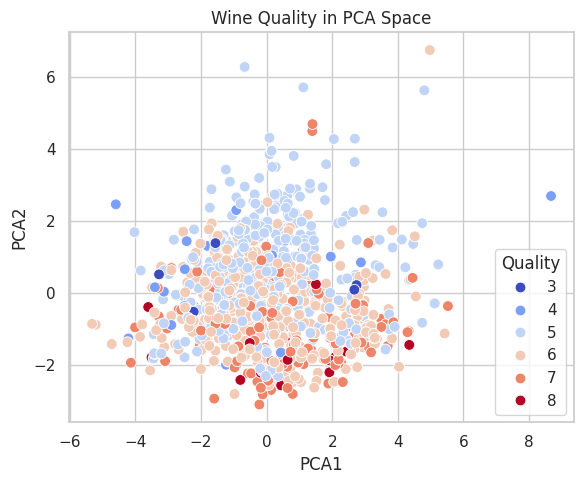

In [116]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=pca_df['PCA1'], y=pca_df['PCA2'], hue=df['quality'], palette='coolwarm', s=60)
plt.title('Wine Quality in PCA Space')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Quality')
plt.tight_layout()
plt.show()

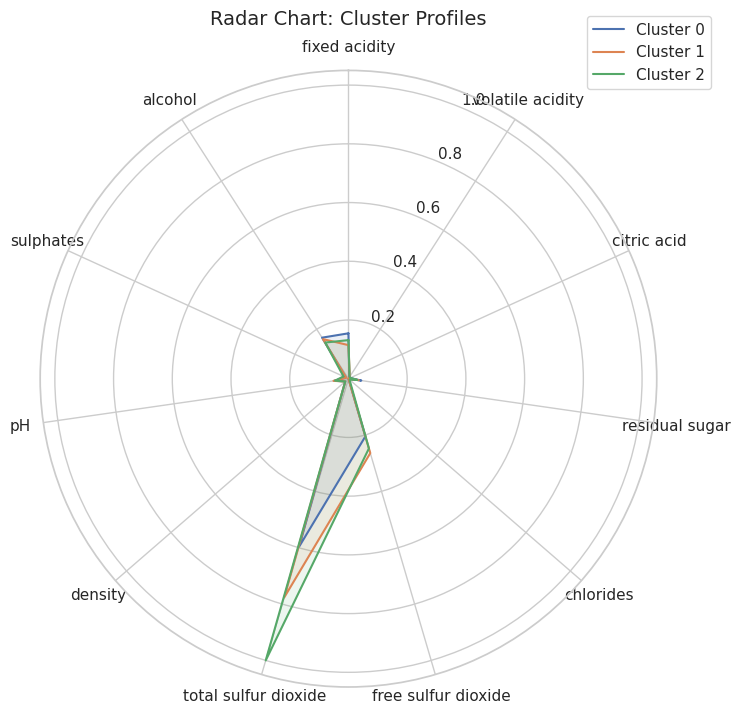

In [89]:
# --- Radar Plot Function ---
def plot_radar(profiles):
    angles = np.linspace(0, 2 * np.pi, len(profiles.index), endpoint=False).tolist()
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for col in profiles.columns:
        values = profiles[col].tolist()
        values += values[:1]
        ax.plot(angles, values, label=f'Cluster {col}')
        ax.fill(angles, values, alpha=0.1)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels=profiles.index)
    ax.set_title("Radar Chart: Cluster Profiles", va='bottom', pad=30, fontsize=14)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.tight_layout(pad=2.5)
    plt.show()

plot_radar(norm_profile)

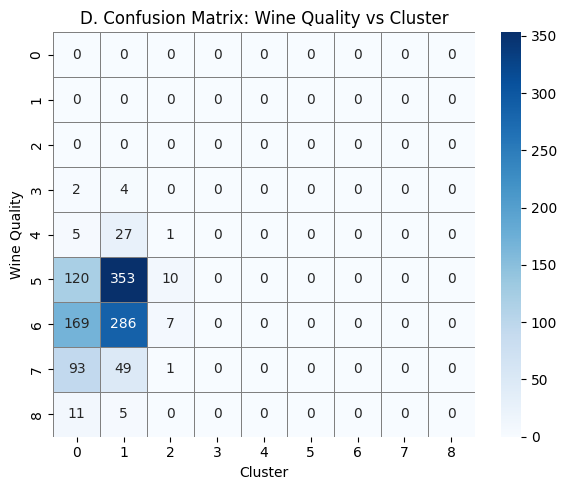

In [47]:
# Confusion Matrix (Cluster vs Quality)
conf_mat = confusion_matrix(df['quality'], df['cluster'])
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='gray')
plt.title('D. Confusion Matrix: Wine Quality vs Cluster')
plt.xlabel('Cluster')
plt.ylabel('Wine Quality')
plt.tight_layout()
plt.show()

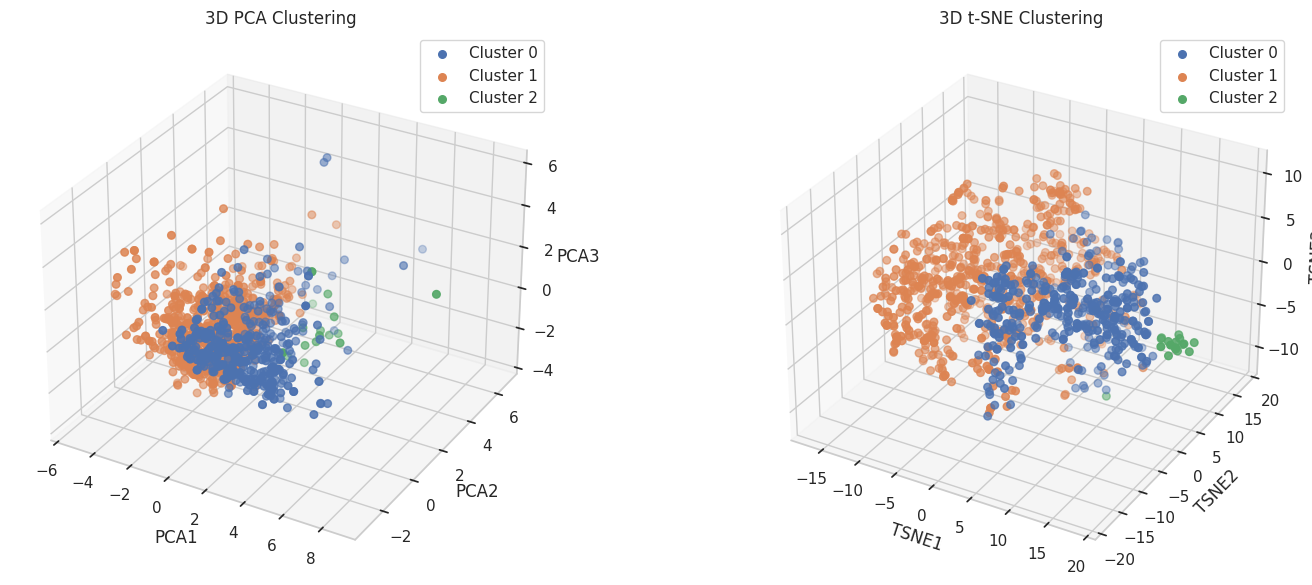

In [120]:
# 3D PCA vs t-SNE Clustering
tsne_3d = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42).fit_transform(scaled_features)
def plot_3d_comparison(pca_data, tsne_data, labels):
    fig = plt.figure(figsize=(16, 6))

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    for i in np.unique(labels):
        ax1.scatter(*pca_data[labels == i].T, label=f'Cluster {i}', s=30)
    ax1.set_title("3D PCA Clustering")
    ax1.set_xlabel("PCA1"); ax1.set_ylabel("PCA2"); ax1.set_zlabel("PCA3")
    ax1.legend()

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    for i in np.unique(labels):
        ax2.scatter(*tsne_data[labels == i].T, label=f'Cluster {i}', s=30)
    ax2.set_title("3D t-SNE Clustering")
    ax2.set_xlabel("TSNE1"); ax2.set_ylabel("TSNE2"); ax2.set_zlabel("TSNE3")
    ax2.legend()

    plt.tight_layout()
    plt.show()

plot_3d_comparison(pca_3d, tsne_3d, clusters)


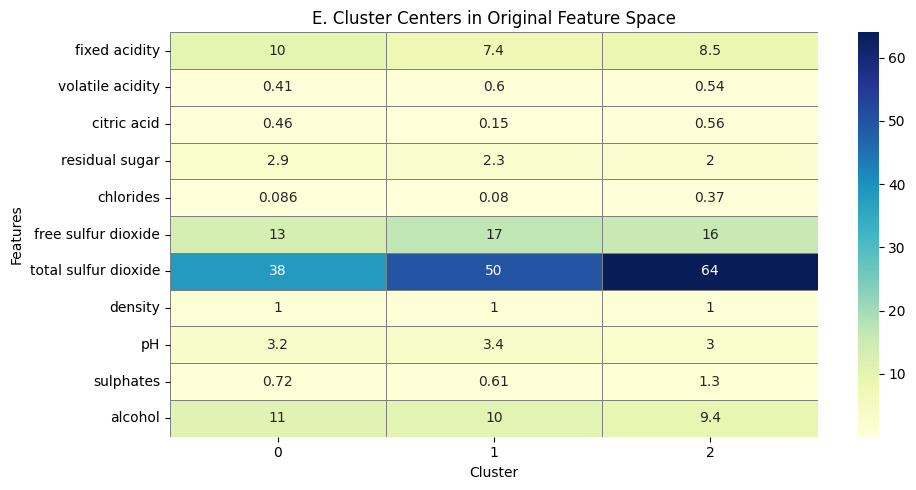

In [48]:
# Cluster Centers in Original Feature Space
cluster_centers_df = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns)
plt.figure(figsize=(10, 5))
sns.heatmap(cluster_centers_df.T, annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('E. Cluster Centers in Original Feature Space')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.tight_layout()
plt.show()